In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


In [2]:
df = pd.read_csv(r'/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

 2   CarName           205 non-null    object               
 3   fueltype          205 non-null    object          
 4   aspiration        205 non-null    object           
 5   doornumber        205 non-null    object           
 6   carbody           205 non-null    object            
 7   drivewheel        205 non-null    object            
 8   enginelocation    205 non-null    object            
 14  enginetype        205 non-null    object              
 15  cylindernumber    205 non-null    object           

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
df.corr()

/tmp/ipykernel_20/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

price = df['price']
fueltype = df['fueltype']

#sns.pairplot(df)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


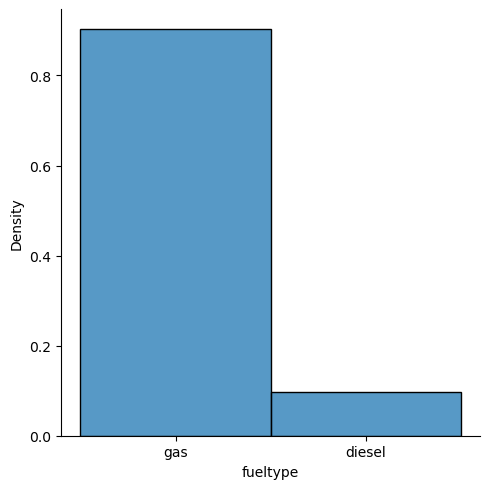

In [11]:
sns.displot(df,x="fueltype", stat="density");

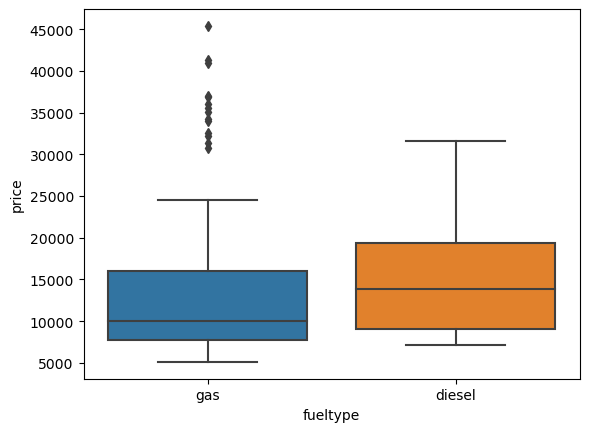

In [12]:
sns.boxplot(data=df,x='fueltype',y='price');

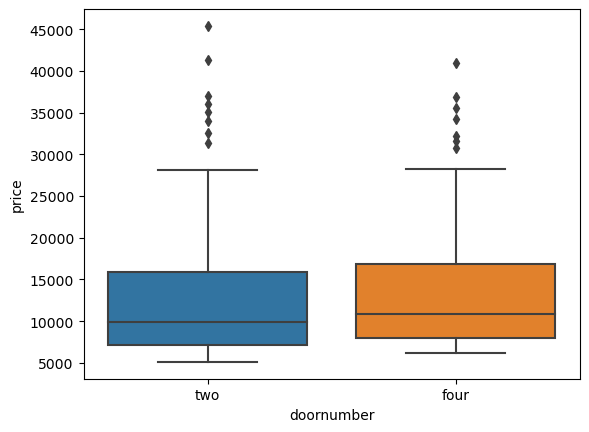

In [13]:
sns.boxplot(data=df, x="doornumber", y="price");

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


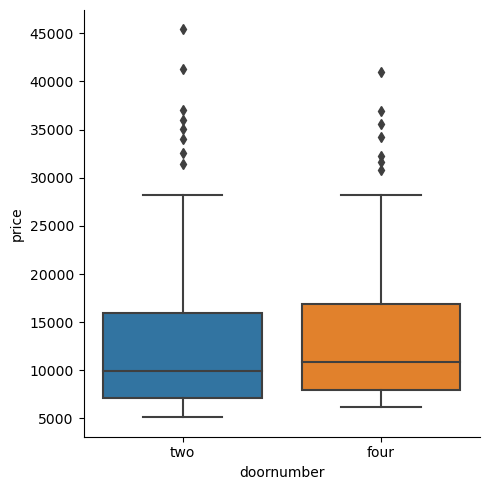

In [14]:
sns.catplot(data=df, x="doornumber", y="price", kind="box")

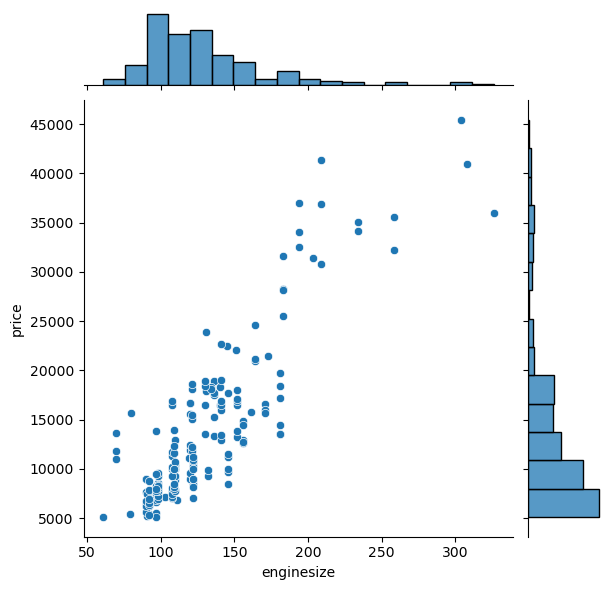

In [15]:
sns.jointplot(data=df, x="enginesize", y="price");

**We can see that engine size 50 -200 have max price close to 25000(in dollars) and maximum cars have the enginesize between 50-200. and we can say that as engine size increases the price of car increases gradually**

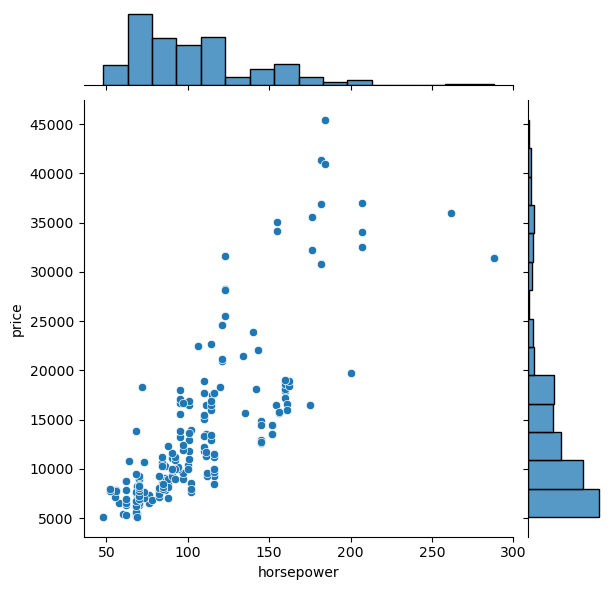

In [16]:
sns.jointplot(data=df, x="horsepower", y="price");

**More the horsepower the more price.Highest price of car is having horse power between 150-200**

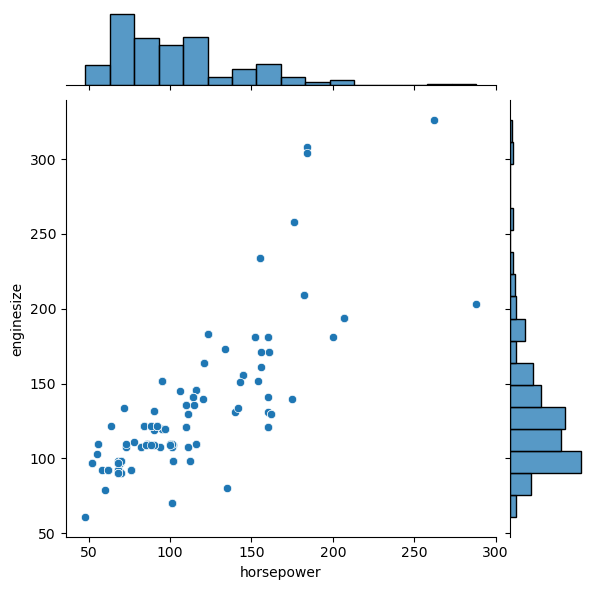

In [17]:
sns.jointplot(data=df, x="horsepower", y="enginesize");

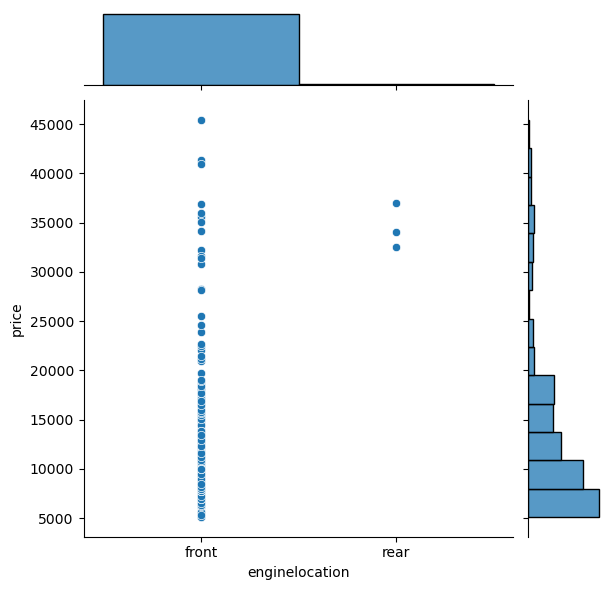

In [18]:
sns.jointplot(data=df, x="enginelocation", y="price");

In [19]:
#getting carname who has engine located at rear end of the car
df.loc[df['enginelocation'] == 'rear', 'CarName'].unique()

array(['porcshce panamera', 'porsche cayenne', 'porsche boxter'],
      dtype=object)

/tmp/ipykernel_20/2716152772.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price']);


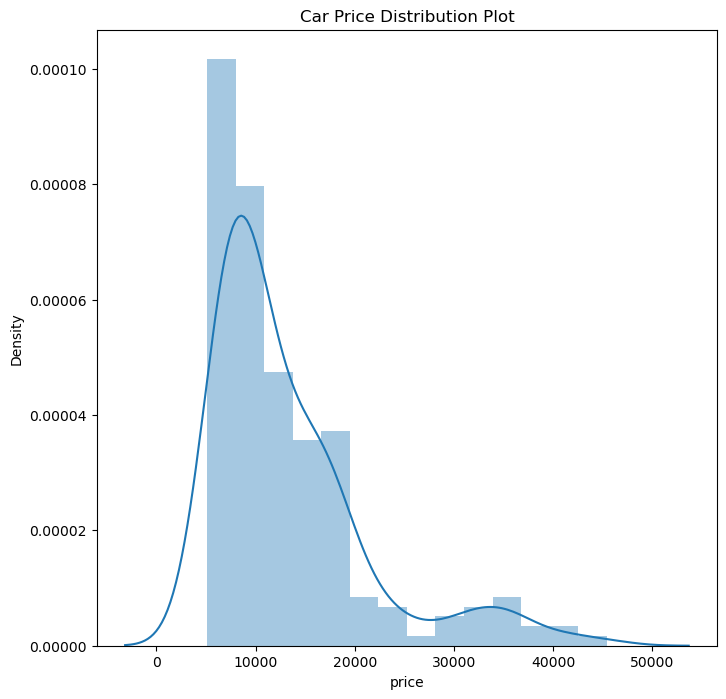

In [20]:
plt.figure(figsize=(8,8));

plt.title('Car Price Distribution Plot');
sns.distplot(df['price']);

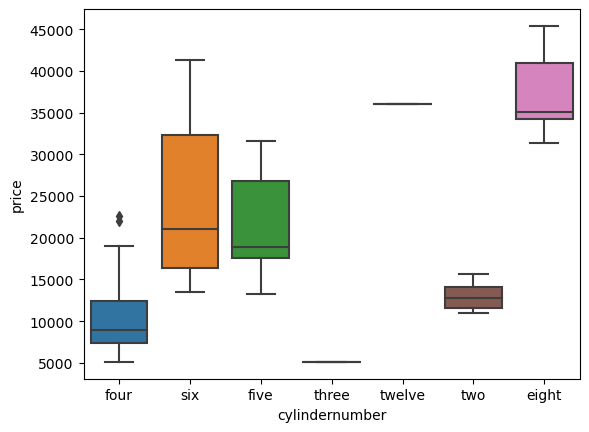

In [21]:
sns.boxplot(data=df, x="cylindernumber", y="price");

**The price of car is directly proportional to no. of cylinders in most cases.**

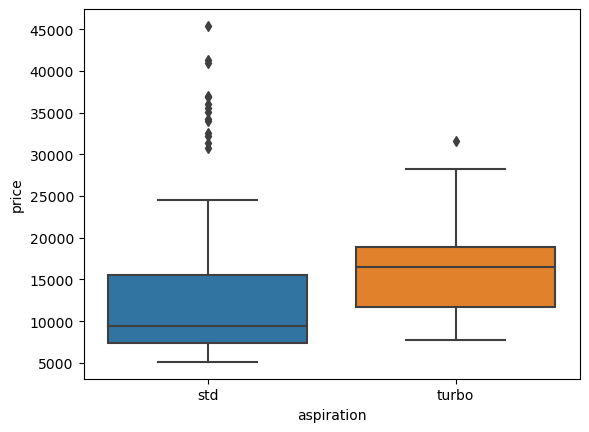

In [22]:
sns.boxplot(data=df, x="aspiration", y="price");


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


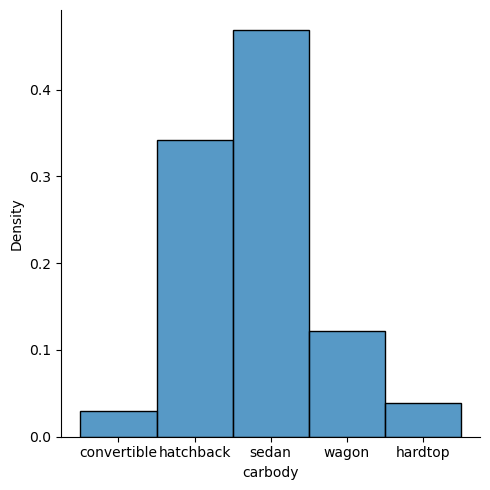

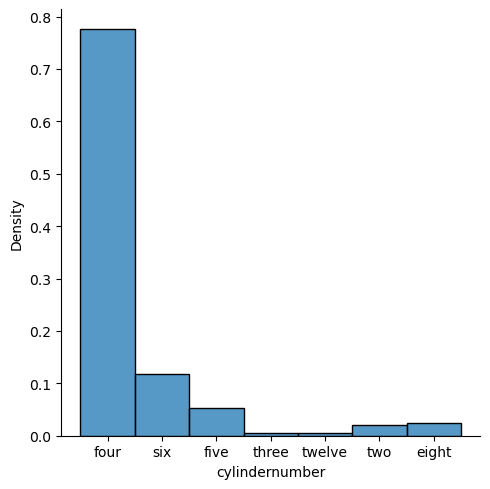

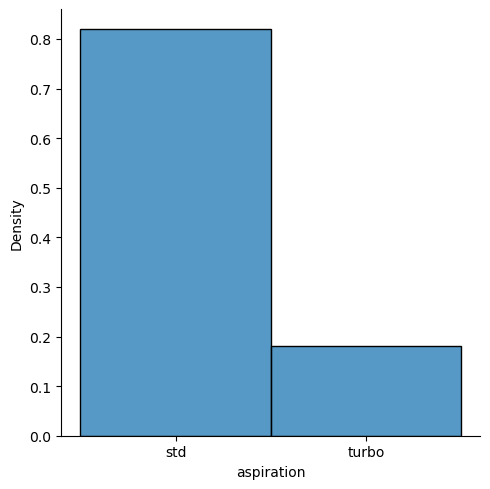

In [23]:
sns.displot(df,x="carbody", stat="density");
sns.displot(df,x="cylindernumber", stat="density");
sns.displot(df,x="aspiration", stat="density");

# Final Insights
1. **Fuel Type Impact**: Cars running on diesel tend to be more expensive compared to those running on gas.
2. **Car Body Influence:** All types of car bodies are relatively more affordable than convertible car bodies, indicating that convertibles are often priced higher.
3. **Engine Location Matters:** Cars with a rear engine location are significantly more expensive than cars with a front engine location, suggesting that rear-engine cars are associated with higher price ranges.
4. **Cylinder Count Relation:** In general, the price of a car is positively correlated with the number of cylinders it has.
5. **Engine Type and Price:** Cars equipped with the engine type 'ohcv' are found in the higher price range segment.
6. **Door Number's Impact:** The number of doors in a car doesn't appear to have a significant effect on its price.
7. **Drivetrain Influence:** High-end cars tend to have a rear-wheel-drive (RWD) drivetrain, which might contribute to their higher price.
8. **Cylinder Preference:** The majority of cars in the dataset are equipped with four cylinders, indicating that four-cylinder engines are the most commonly used type among the cars.
9. **Fuel Type Distribution:** Gas-fueled cars significantly outnumber diesel-fueled cars, implying that gas is the more popular and widely used fuel type among the cars in the dataset.
10. **Sedan Popularity:** Sedan is the most preferred car type, as it is the dominant car body style found in the dataset.

<Figure size 2000x600 with 0 Axes>

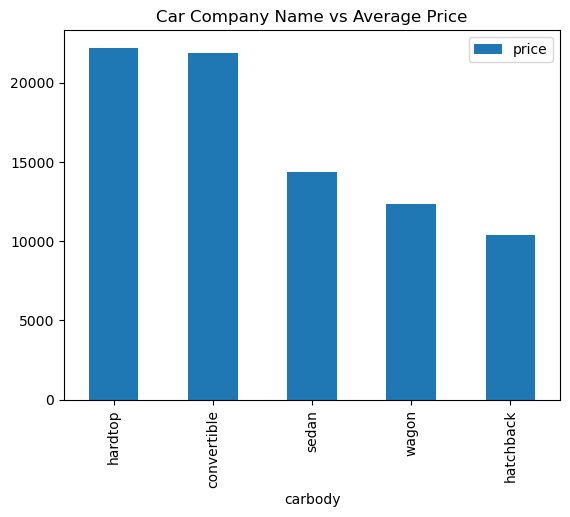

In [24]:
plt.figure(figsize=(20, 6))

df_auto = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df_auto.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

**Okay so after Visulization we get some important features**   
1. carbody 
2. fueltype
3. enginesize
4. cylindernumber
5. aspiration
6. horsepower
7. doornumber 

**Now we will drop features which are less correlated with the targeted feature inshort which would have less impact if the price increases or not**

In [25]:
#encoding the categorical Variables
# List of categorical columns to encode
categorical_columns = ['CarName', 'fueltype', 'aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber']

# Perform One-Hot Encoding for all categorical columns
encoded_df = pd.get_dummies(df, columns=categorical_columns)

In [26]:
encoded_df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1,3,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,...,0,0,0,0,0,1,0,0,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,...,0,0,0,0,0,1,0,0,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,...,0,1,0,0,0,0,1,0,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,...,0,0,0,0,0,1,0,0,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,...,0,0,0,0,1,0,0,0,0,0


In [27]:
df.corr()

/tmp/ipykernel_20/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [28]:
df_new = encoded_df.drop(['car_ID','symboling','stroke','compressionratio','peakrpm','fuelsystem'],axis=1)

In [29]:
df_new.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,27,...,0,0,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,27,...,0,0,0,0,0,1,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,154,19,26,...,0,1,0,0,0,0,1,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,102,24,30,...,0,0,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,115,18,22,...,0,0,0,0,1,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [31]:
X_train, X_test, y_train, y_test=train_test_split(df_new.drop(['price'],axis=1),df_new['price'],test_size=0.3,random_state=242)

In [32]:
print("X Train shape :",X_train.shape)
print("Y Train shape :",y_train.shape)

X Train shape : (143, 187)
Y Train shape : (143,)


In [33]:
print("X Test shape :",X_test.shape)
print("Y Test shape :",y_test.shape)

X Test shape : (62, 187)
Y Test shape : (62,)


# **MODEL 1 : LINEAR REGRESSION**

In [34]:
## Create an instance of LinearRegression
regressor = LinearRegression()

# Scale the features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

#Fit the model to the training data
regressor.fit(X_train, y_train)

# Generate the predicted values for both training and testing sets
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)


Mean Squared Error: 52030299.750930265


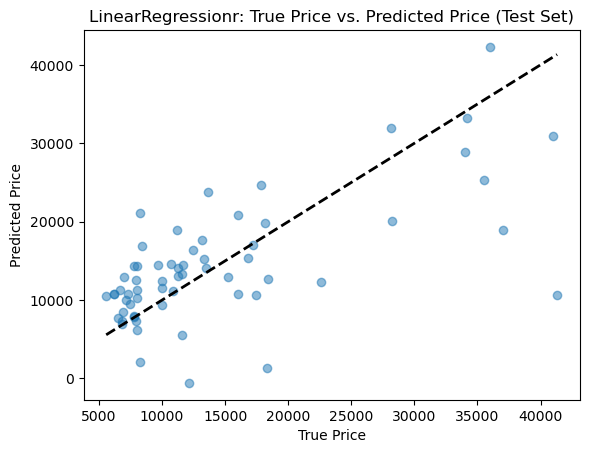

In [35]:
from sklearn.metrics import mean_squared_error

# Calculating Mean Squared Error (MSE)
mse1 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse1)

# Plot the true target values vs. the predicted values for the test set
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('LinearRegressionr: True Price vs. Predicted Price (Test Set)')
plt.show()

# **MODEL 2 : SGDRegressor with l2 Penalty**

Mean Squared Error: 17610571.69480222


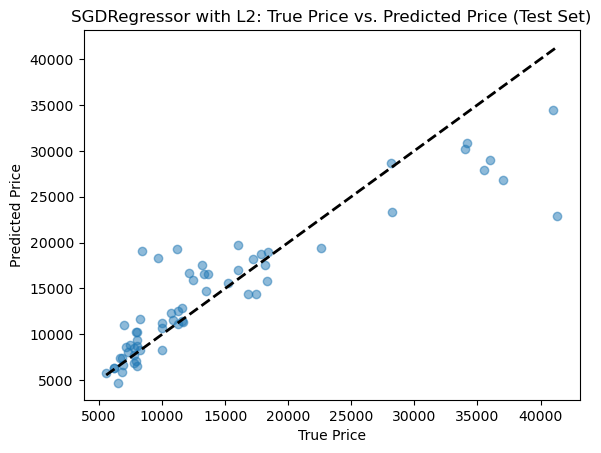

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

regressor2 = SGDRegressor(penalty='l2',alpha=0.01,max_iter=10000,random_state=242)

#Fit the model to the training data
regressor2.fit(X_train_scaled, y_train)

# Generate the predicted values for both training and testing sets
y_train_pred2 = regressor2.predict(X_train_scaled)
y_test_pred2 = regressor2.predict(X_test_scaled)

# Calculating Mean Squared Error (MSE)
sgd_mse = mean_squared_error(y_test, y_test_pred2)
print("Mean Squared Error:", sgd_mse)

# Plot the true target values vs. the predicted values for the test set
plt.scatter(y_test, y_test_pred2, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('SGDRegressor with L2: True Price vs. Predicted Price (Test Set)')
plt.show()

# **MODEL 3 - RandomForestRegressor**

Mean Squared Error: 6443054.343262027


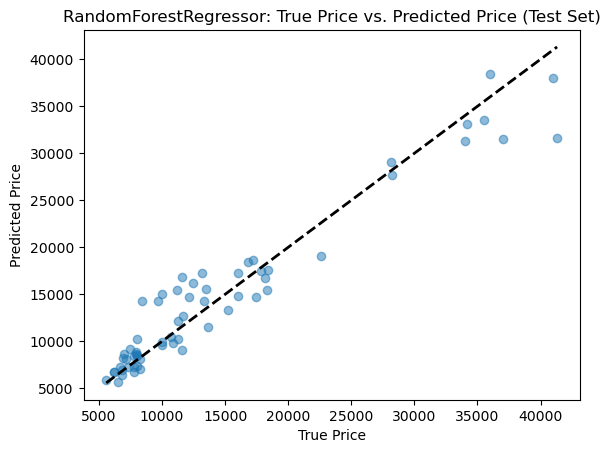

In [37]:
regressor3 = RandomForestRegressor(n_estimators=100,max_depth=10)

#Fit the model to the training data
regressor3.fit(X_train, y_train)

# Generate the predicted values for both training and testing sets
y_train_pred3 = regressor3.predict(X_train)
y_test_pred3 = regressor3.predict(X_test)

# Calculating Mean Squared Error (MSE)
random_forest_mse = mean_squared_error(y_test, y_test_pred3)
print("Mean Squared Error:", random_forest_mse)

# Plot the true target values vs. the predicted values for the test set
plt.scatter(y_test, y_test_pred3, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('RandomForestRegressor: True Price vs. Predicted Price (Test Set)')
plt.show()

# **MODEL 4 - XGBRegressor**

XGBoost Model MSE: 6632386.416660751


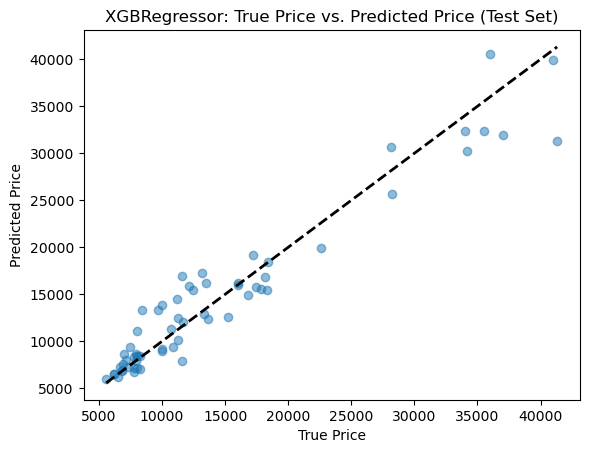

In [38]:
from xgboost import XGBRegressor

# Create an XGBRegressor model with tuned parameters
xgb_model = XGBRegressor(n_estimators=100, 
                         max_depth=3,
                         random_state=42)

# Fit the model to your data
xgb_model.fit(X_train_scaled, y_train)

# Predict using the model
xgb_predictions = xgb_model.predict(X_test_scaled)

# Calculate MSE for the XGBoost model
xgb_mse = mean_squared_error(y_test, xgb_predictions)

# Print the MSE value
print("XGBoost Model MSE:", xgb_mse)

# Plot the true target values vs. the predicted values for the test set
plt.scatter(y_test, xgb_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('XGBRegressor: True Price vs. Predicted Price (Test Set)')
plt.show()

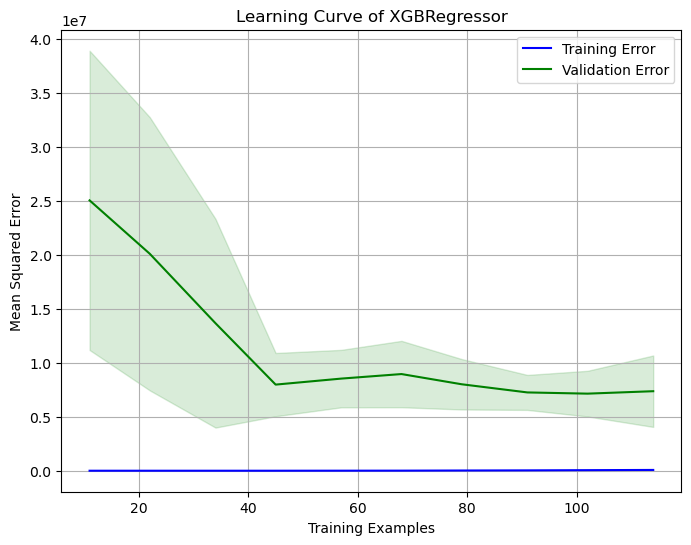

In [39]:
from sklearn.model_selection import learning_curve

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(xgb_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training and testing scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Error', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Error', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve of XGBRegressor')
plt.legend()
plt.grid()
plt.show()

**Insufficient Training Data:** We have relatively small dataset, a learning curve may not converge because the model has not seen enough examples to generalize well.

# Another method to compare your models perfomamce

Linear MSE: 52030299.750930265
SGD MSE: 17610571.69480222
Random MSE: 6443054.343262027
XGb MSE: 6632386.416660751


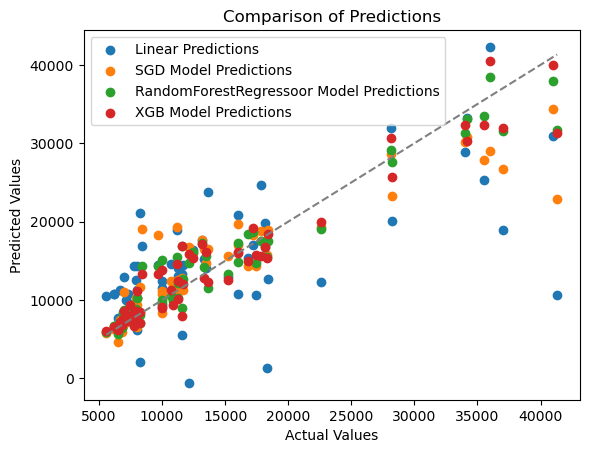

In [40]:
# Compare MSE values
print("Linear MSE:", mse1)
print("SGD MSE:", sgd_mse)
print("Random MSE:", random_forest_mse)
print("XGb MSE:", xgb_mse)


# Visualize predictions from both models
plt.scatter(y_test, y_test_pred, label="Linear Predictions")
plt.scatter(y_test, y_test_pred2, label="SGD Model Predictions")
plt.scatter(y_test, y_test_pred3, label="RandomForestRegressoor Model Predictions")
plt.scatter(y_test, xgb_predictions, label="XGB Model Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of Predictions")
plt.legend()
plt.show()

# **In summary:**

**The models' performances can be ranked from the lowest to highest MSE as follows:                 Random Forest < XGBoost < SGD < Linear Regression. 
The lower MSE values indicate that the Random Forest and XGBoost models are currently performing better than the linear regression and SGD models in terms of predicting the target values**